# Mounting Drive
Mounting drive to fetch dataset and other resources from the drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Installing Spektral Library

In [ ]:
!pip install git+https://github.com/danielegrattarola/spektral

  Cloning https://github.com/danielegrattarola/spektral to /tmp/pip-req-build-uzsn6zp2
  Running command git clone -q https://github.com/danielegrattarola/spektral /tmp/pip-req-build-uzsn6zp2
  Created wheel for spektral: filename=spektral-1.0.8-py3-none-any.whl size=123386 sha256=ba3a682391200d4d62c501e5e018aa1ae8be50c9be405493cb81546ae2a75486
  Stored in directory: /tmp/pip-ephem-wheel-cache-nudnqanb/wheels/af/7c/1f/e06aba9c0f493bb708968b8b396fe7523fdfb1c1c0818730be
Successfully built spektral


# Loading Dataset 

In [ ]:
# Dataset loading
import os

dataset = "/content/drive/MyDrive/Project GCN Dataset/Dataset (Labelled Images)/"
# dataset = "./Dataset (Labelled Images)/"
lab_files_path = dataset+"label/"
# lab_files_path = dataset+"label/"

# total invoice files
files = os.listdir(lab_files_path)


# training set
train = files[:120]

# validation set
valid_set = files[120:125]

# test set
test = files[125: ]

print("Total Label files are: ", len(files))


Total Label files are:  129


# Geometric Algo

In [ ]:
from PIL.Image import Image
from networkx.algorithms.shortest_paths.weighted import single_source_dijkstra
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
from PIL import Image
import networkx as nx


# csv = './A-10.csv'
# df = pd.read_csv(csv)
df = 0
xMIN, xMAX = [], []
yMIN, yMAX = [], []
Text = []


def findRight(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmax = xMAX[df_ind]
    ymin = yMIN[df_ind]
    ymax = yMAX[df_ind]

    for i in range(len(df)):
        if(xMIN[i] > xmax):
            if not (yMIN[i] > ymax or yMAX[i] < ymin):
                if(yMIN[i] <= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] <= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] == ymin and yMAX[i] == ymax):
                    S_list.append(i)

    # print(S_list)
    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(xMIN[consec] > xMIN[j]):
                consec = j
        return consec

    return -1


def findLeft(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmin = xMIN[df_ind]
    ymin = yMIN[df_ind]
    ymax = yMAX[df_ind]

    for i in range(len(df)):
        if(xMAX[i] < xmin):
            if not (yMIN[i] > ymax or yMAX[i] < ymin):
                if(yMIN[i] <= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] <= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] == ymin and yMAX[i] == ymax):
                    S_list.append(i)
    # print(S_list)
    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(xMAX[j] > xMAX[consec]):
                consec = j
        return consec
    return -1


def findUp(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmin = xMIN[df_ind]
    xmax = xMAX[df_ind]
    ymin = yMIN[df_ind]

    for i in range(len(df)):
        if(yMAX[i] < ymin):
            if not (xMAX[i] < xmin or xMIN[i] > xmax):
                if(xMIN[i] <= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] <= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] == xmin and xMAX[i] == xmax):
                    S_list.append(i)
    # print(S_list)

    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(yMAX[j] > yMAX[consec]):
                consec = j
        return consec

    return -1


def findDown(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmin = xMIN[df_ind]
    xmax = xMAX[df_ind]
    ymax = yMAX[df_ind]

    for i in range(len(df)):
        if(yMIN[i] > ymax):
            if not (xMAX[i] < xmin or xMIN[i] > xmax):
                if(xMIN[i] <= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] <= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] == xmin and xMAX[i] == xmax):
                    S_list.append(i)
    # print(S_list)
    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(yMIN[j] < yMIN[consec]):
                consec = j
        return consec

    return -1


def makeGraph(df):
    G = nx.Graph()
    xMIN = df['xmin']
    xMAX = df['xmax']
    yMIN = df['ymin']
    yMAX = df['ymax']
    Text = df['Object']

    for i in range(len(df)):
        if findUp(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findUp(df, i, xMIN, xMAX, yMIN, yMAX)
            if(l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
        if findRight(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findRight(df, i, xMIN, xMAX, yMIN, yMAX)
            if (l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
        if findDown(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findDown(df, i, xMIN, xMAX, yMIN, yMAX)
            if (l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
        if findLeft(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findLeft(df, i, xMIN, xMAX, yMIN, yMAX)
            if (l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
    return G


# Matrices Over Diagonal
Place an incident Matrix over diagonal with existing matrix

In [ ]:
from typing import SupportsAbs
from numpy.core.fromnumeric import shape

# Test Matrices
# mat1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# mat2 = np.array([[3, 2, 1, 7], [6, 5, 4, 9], [9, 8, 7, 4], [1, 5, 7, 2]])


def alignDiagonally(M1, M2, prev_Len):
    for i in range(prev_Len, np.shape(M1)[0]):
        for j in range(prev_Len, np.shape(M1)[0]):
            x = i - prev_Len
            y = j - prev_Len
            M1[i][j] = M2[x][y]

    return M1


def resizeMatrix(M, I):
    oldMat_Len = np.shape(M)[0]
    z = np.zeros((oldMat_Len, np.shape(I)[0]), dtype=np.int64)
    newArray = np.append(M, z, axis=1)
    M = newArray

    # Appending 1D arrays of zeros in the original Matrix
    # (i.e. the matrix in which we want to align othe rmatrices diagonally)
    # for i in range(appZero):
    #     M = np.vstack((M, L))
    appZero = np.shape(I)[0]
    x = oldMat_Len + appZero
    L = np.zeros((np.shape(I)[0], x), dtype=np.int64)
    newArray = np.append(M, L, axis=0)
    M = newArray

    M = alignDiagonally(M, I, oldMat_Len)
    return M


# Dataset Batch 1

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
from numpy.core.fromnumeric import shape

Z_file = lab_files_path + train[0]
df = pd.read_csv(Z_file)
G = makeGraph(df)
M1 = nx.to_numpy_array(G, dtype=np.int32)

for i in range(1, 26):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + files[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe. 
    G = makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M1 = resizeMatrix(M1, I)

print("Dimentions of Batch 1 matrix is: ", np.shape(M1))


= = = = = = = = = = = = = = = =
Iteration No.:  1

= = = = = = = = = = = = = = = =
Iteration No.:  2

= = = = = = = = = = = = = = = =
Iteration No.:  3

= = = = = = = = = = = = = = = =
Iteration No.:  4

= = = = = = = = = = = = = = = =
Iteration No.:  5

= = = = = = = = = = = = = = = =
Iteration No.:  6

= = = = = = = = = = = = = = = =
Iteration No.:  7

= = = = = = = = = = = = = = = =
Iteration No.:  8

= = = = = = = = = = = = = = = =
Iteration No.:  9

= = = = = = = = = = = = = = = =
Iteration No.:  10

= = = = = = = = = = = = = = = =
Iteration No.:  11

= = = = = = = = = = = = = = = =
Iteration No.:  12

= = = = = = = = = = = = = = = =
Iteration No.:  13

= = = = = = = = = = = = = = = =
Iteration No.:  14

= = = = = = = = = = = = = = = =
Iteration No.:  15

= = = = = = = = = = = = = = = =
Iteration No.:  16

= = = = = = = = = = = = = = = =
Iteration No.:  17

= = = = = = = = = = = = = = = =
Iteration No.:  18

= = = = = = = = = = = = = = = =
Iteration No.:  19

= = = = = = = = = = 

# Dataset Batch 2

In [ ]:
Z1_file = lab_files_path + files[26]
df = pd.read_csv(Z1_file)
G = makeGraph(df)
M2 = nx.to_numpy_array(G, dtype=np.int32)

for i in range(27, 65):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + files[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe. 
    G = makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M2 = resizeMatrix(M2, I)

print("Dimentions of Batch 2 matrix is: ", np.shape(M2))


= = = = = = = = = = = = = = = =
Iteration No.:  27

= = = = = = = = = = = = = = = =
Iteration No.:  28

= = = = = = = = = = = = = = = =
Iteration No.:  29

= = = = = = = = = = = = = = = =
Iteration No.:  30

= = = = = = = = = = = = = = = =
Iteration No.:  31

= = = = = = = = = = = = = = = =
Iteration No.:  32

= = = = = = = = = = = = = = = =
Iteration No.:  33

= = = = = = = = = = = = = = = =
Iteration No.:  34

= = = = = = = = = = = = = = = =
Iteration No.:  35

= = = = = = = = = = = = = = = =
Iteration No.:  36

= = = = = = = = = = = = = = = =
Iteration No.:  37

= = = = = = = = = = = = = = = =
Iteration No.:  38

= = = = = = = = = = = = = = = =
Iteration No.:  39

= = = = = = = = = = = = = = = =
Iteration No.:  40

= = = = = = = = = = = = = = = =
Iteration No.:  41

= = = = = = = = = = = = = = = =
Iteration No.:  42

= = = = = = = = = = = = = = = =
Iteration No.:  43

= = = = = = = = = = = = = = = =
Iteration No.:  44

= = = = = = = = = = = = = = = =
Iteration No.:  45

= = = = = =

# Dataset Batch 3

In [ ]:
Z2_file = lab_files_path + files[65]
df = pd.read_csv(Z2_file)
G = makeGraph(df)
M3 = nx.to_numpy_array(G, dtype=np.int32)
    
for i in range(66, 120):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + files[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe. 
    G = makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M3 = resizeMatrix(M3, I)

print("Dimentions of Batch 3 matrix is: ", np.shape(M3))


= = = = = = = = = = = = = = = =
Iteration No.:  66

= = = = = = = = = = = = = = = =
Iteration No.:  67

= = = = = = = = = = = = = = = =
Iteration No.:  68

= = = = = = = = = = = = = = = =
Iteration No.:  69

= = = = = = = = = = = = = = = =
Iteration No.:  70

= = = = = = = = = = = = = = = =
Iteration No.:  71

= = = = = = = = = = = = = = = =
Iteration No.:  72

= = = = = = = = = = = = = = = =
Iteration No.:  73

= = = = = = = = = = = = = = = =
Iteration No.:  74

= = = = = = = = = = = = = = = =
Iteration No.:  75

= = = = = = = = = = = = = = = =
Iteration No.:  76

= = = = = = = = = = = = = = = =
Iteration No.:  77

= = = = = = = = = = = = = = = =
Iteration No.:  78

= = = = = = = = = = = = = = = =
Iteration No.:  79

= = = = = = = = = = = = = = = =
Iteration No.:  80

= = = = = = = = = = = = = = = =
Iteration No.:  81

= = = = = = = = = = = = = = = =
Iteration No.:  82

= = = = = = = = = = = = = = = =
Iteration No.:  83

= = = = = = = = = = = = = = = =
Iteration No.:  84

= = = = = =

# Validation Matrix

In [ ]:
Z3_file = lab_files_path + files[120]
df = pd.read_csv(Z3_file)
G = makeGraph(df)
M4 = nx.to_numpy_array(G, dtype=np.int32)
    
for i in range(121, 125):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + files[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe. 
    G = makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M4 = resizeMatrix(M4, I)

print("Dimentions of Validation matrix is: ", np.shape(M4))


= = = = = = = = = = = = = = = =
Iteration No.:  121

= = = = = = = = = = = = = = = =
Iteration No.:  122

= = = = = = = = = = = = = = = =
Iteration No.:  123

= = = = = = = = = = = = = = = =
Iteration No.:  124
Dimentions of Validation matrix is:  (420, 420)


# Test Matrix

In [ ]:
Z4_file = lab_files_path + files[125]
df = pd.read_csv(Z4_file)
G = makeGraph(df)
M5 = nx.to_numpy_array(G, dtype=np.int32)
    
for i in range(126, len(files)):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + files[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe. 
    G = makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M5 = resizeMatrix(M5, I)

print("Dimentions of Test matrix is: ", np.shape(M5))


= = = = = = = = = = = = = = = =
Iteration No.:  126

= = = = = = = = = = = = = = = =
Iteration No.:  127

= = = = = = = = = = = = = = = =
Iteration No.:  128
Dimentions of Test matrix is:  (298, 298)


# Saving Batches

In [ ]:
print("Saving Matrix")
# np.save("./Matrices/Matrix_b1.npy", M1)
np.save("/content/drive/MyDrive/Project GCN Dataset/Mat1.npy", M1)
np.save("/content/drive/MyDrive/Project GCN Dataset/Mat2.npy", M2)
np.save("/content/drive/MyDrive/Project GCN Dataset/Mat3.npy", M3)
np.save("/content/drive/MyDrive/Project GCN Dataset/ValMat.npy", M4)
np.save("/content/drive/MyDrive/Project GCN Dataset/TestMat.npy", M5)

print("Saved")

Saving Matrix
Saved


# Loading Matrix
Loading the sparce matrix in a variable A.

In [ ]:
import numpy as np

# loading matrix
# A = np.load("./Matrices/Mat1.npy")
A1 = np.load("/content/drive/MyDrive/Project GCN Dataset/Mat1.npy")
A2 = np.load("/content/drive/MyDrive/Project GCN Dataset/Mat2.npy")
A3 = np.load("/content/drive/MyDrive/Project GCN Dataset/Mat3.npy")
A4 = np.load("/content/drive/MyDrive/Project GCN Dataset/ValMat.npy")
A5 = np.load("/content/drive/MyDrive/Project GCN Dataset/TestMat.npy")
print("Printing Sparse Batch 1..")
print(A1)
print("Printing Sparse Batch 2..")
print(A2)
print("Printing Sparse Batch 3..")
print(A3)
print("Printing Sparse Validation Batch..")
print(A4)
print(np.shape(A1))


Printing Sparse Batch 1..
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]
Printing Sparse Batch 2..
[[1 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]]
Printing Sparse Batch 3..
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
Printing Sparse Validation Batch..
[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]
(5762, 5762)


# Varifying Dataaset Batches

In [ ]:
t_batch_sizes = np.shape(A1)[0] + np.shape(A2)[0] + np.shape(A3)[0] + np.shape(A4)[0] + np.shape(A5)[0]
print("Total batch size is: ", t_batch_sizes)

Total batch size is:  21097


# Checking Sparse Matrix

(5762, 5762)


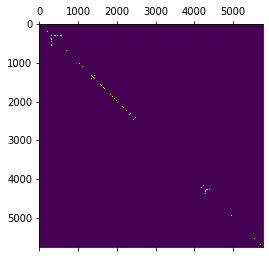

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(A1)
print(np.shape(A1))

# Generating Labels

In [ ]:
from numpy import nan


def returnLabels(direc, files):
    labels = []
    for f in range(len(files)):
        seenList = []
        df = pd.read_csv(direc + files[f])
        text = df['Object'].to_list()
        T_labels = df['labels'].to_list()

        for i in range(len(text)):
            if(text[i] not in seenList):
                labels.append(T_labels[i])
            seenList.append(text[i])

    return labels

# Encoding Labels
1. Get a list of labels from CSV files.
2. Catagorically encode the labels 

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


labels = returnLabels(lab_files_path, files)
print("Total labels are: ", len(labels))

print("Encoding list..")
lab_encoder = LabelEncoder()
encodings = lab_encoder.fit_transform(labels)
print("Total Encodings are: ", len(encodings))


uni_enc = set(encodings)
print("Unique Encodings are: ", uni_enc)
encodings = np.transpose(encodings)

# Encodings for Mat_b1 are
e1_encodings_size = np.shape(A1)[0]
print("Size of batch1 matrix is: ", e1_encodings_size)
e1 = encodings[0:e1_encodings_size]
print("Total encodings for batch1 matrix are: ", len(e1))

# # Encodings for Mat_b2 are
e2_encodings_size = np.shape(A2)[0]
print("Size of batch2 matrix is: ", e1_encodings_size)
e2 = encodings[e1_encodings_size:e2_encodings_size+e1_encodings_size]
print("Total encodings for batch2 matrix are: ", len(e2))

# # Encodings for Mat_b3 are
e3_encodings_size = np.shape(A3)[0]
start = e2_encodings_size+e1_encodings_size
print("Size of batch3 matrix is: ", e1_encodings_size)
e3 = encodings[start:start+e3_encodings_size]
print("Total encodings for batch3 matrix are: ", len(e3))

# # Encodings for validation set are
e4_encodings_size = np.shape(A4)[0]
start += e3_encodings_size
val_enc  = encodings[start:start+e4_encodings_size]

# # Encodings for test set are
e5_encodings_size = np.shape(A5)[0]
start += e4_encodings_size
test_enc  = encodings[start:]
print("Length of test encodings are: ", start)
print("Length of test encodings are: ", len(encodings))

# print("Total encodings for batch4 matrix are: ", len(e4))

# print("Total length", (len(e1) + len(e2) + len(e3) +len(e4)))

# print("Encodings for Batch 1 Matrix is: ", set(e1))


Total labels are:  21097
Encoding list..
Total Encodings are:  21097
Unique Encodings are:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
Size of batch1 matrix is:  5762
Total encodings for batch1 matrix are:  5762
Size of batch2 matrix is:  5762
Total encodings for batch2 matrix are:  5410
Size of batch3 matrix is:  5762
Total encodings for batch3 matrix are:  9207
Length of test encodings are:  20799
Length of test encodings are:  21097


# Importing Deep Learning Libraries

In [ ]:
# from tensorflow.keras import Sequential

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, Activation
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import tensorflow as tf
from tensorflow.keras.regularizers import l2


from spektral.utils.sparse import sp_matrix_to_sp_tensor
from spektral.layers import GCNConv
from sklearn.metrics import classification_report
from spektral.utils import normalized_laplacian
from spektral.utils.sparse import sp_matrix_to_sp_tensor

import matplotlib.pyplot as plt
print("Libraries Imported..")


Libraries Imported..


# Model Hyper-Parameters

In [ ]:
# Hyper-parameters
channels = 32
dropout = 0.5
# learning_rate = 5e-4
l2_reg = 0.001
learning_rate = 0.0001
# batch_size = np.shape(A1)[0]
batch_size = 16
es_patience = 10


# Node Features

In [ ]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def Node_Features(A):
  # 2-Integer node-feature matrix
  X = np.matrix([[i, -i] for i in range(A.shape[0])])

  # Applying Propogation
  # print("Adj. matrix after propogation..")
  # print(A*X)

  # Self-looping to include node's own features
  # Creating an identity of the same shape
  I = np.matrix(np.eye(A.shape[0]))
  # print("Printing Diagonal Matrix")
  # print(I)

  A_hat = A + I
  
  # Applying propogation with self-looped matrix
  # print("Self-looped Adj. matrix after propogation..")
  # print(A_hat * X)

  # Calculating degree of self-looped matrix
  D = np.array(np.sum(A_hat, axis=0))[0]
  
  D = np.matrix(np.diag(D))
  
  # Inverse of degree(D**-1) * A_hat
  # print("Inverse of degree(D**-1) * A_hat..")
  # print((D**-1) * A_hat)

  # Compiling result
  fin = (D**-1) * A * X
  
  # Applying weights
  W = np.random.randn(X.shape[1], 8) * 0.01
  fin = (D**-1) * A * X * W
  
  # Result after applying relu
  out = relu(fin)
  return out


# Model

In [ ]:
A = A1
N = A.shape[0]
b1_features = Node_Features(A)
F = b1_features.shape[1]

classes = 12

fltr = normalized_laplacian(A)
# X_in = Input(batch_size=N, shape=(F))
X_in = Input(batch_size=None, shape=(F,))
print("Shape of X-in is: ", np.shape(X_in))

# A_in = Input(tensor=sp_matrix_to_sp_tensor(fltr), sparse=True)
# A_in = Input(shape=(None,), sparse=True)
A_in = Input(shape=(None,))
print("Shape of A-in is: ", np.shape(A_in))

# D1 = Dropout(dropout)(X_in)
G1 = GCNConv(channels, activation='LeakyReLU',kernel_regularizer=l2(l2_reg), use_bias=True)([X_in, A_in])
# G1 = GCNConv(channels, activation='LeakyReLU', use_bias=True)([X_in, A_in])
# D2 = Dropout(dropout)(G1)
G2 = GCNConv(channels, activation='LeakyReLU',kernel_regularizer=l2(l2_reg), use_bias=True)([G1, A_in])
# G2 = GCNConv(channels, activation='LeakyReLU', use_bias=True)([G1, A_in])

# # BN = BatchNormalization()(G2)
flatten = Flatten()(G2)

D1 = Dense(128, activation='relu')(flatten)
Dr1 = Dropout(dropout)(D1)
D2 = Dense(32, activation='relu')(Dr1)
Dr2 = Dropout(dropout)(D2)
# D3 = Dense(16, activation='LeakyReLU')(D2)

D2_out = Dense(classes, activation='softmax')(Dr2)

model = Model(inputs=[X_in, A_in], outputs=D2_out)
# other loss = sparse_categorical_crossentropy
# model.compile(optimizer='Adagrad',loss='sparse_categorical_crossentropy', weighted_metrics=['acc'])
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy', weighted_metrics=['acc'])

model.summary()


Shape of X-in is:  (None, 8)
Shape of A-in is:  (None, None)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 gcn_conv (GCNConv)             (None, 32)           288         ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 gcn_conv_1 (GCNConv)           (

# Model-Training

In [ ]:
W = {
    0: np.random.rand(),
    1: np.random.rand(),
    2: np.random.rand(),
    3: np.random.rand(),
    4: np.random.rand(),
    5: np.random.rand(),
    6: np.random.rand(),
    7: np.random.rand(),
    8: np.random.rand(),
    9: np.random.rand(),
    10: np.random.rand(),
    11: np.random.rand(),
}
val_fea = Node_Features(A4)

callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

history = model.fit([b1_features, A1],
          e1,
          epochs=500,
          batch_size=N,
          class_weight=W,
          validation_data=([val_fea, A4], val_enc),
          callbacks=[callback]
        )


Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 8.7769 - acc: 0.2366 - val_loss: 6.9030 - val_acc: 0.0048
Epoch 2/500
1/1 [==============================] - 1s 514ms/step - loss: 8.1173 - acc: 0.2298 - val_loss: 6.7751 - val_acc: 0.0048
Epoch 3/500
1/1 [==============================] - 0s 496ms/step - loss: 7.2266 - acc: 0.2286 - val_loss: 6.6539 - val_acc: 0.0048
Epoch 4/500
1/1 [==============================] - 1s 544ms/step - loss: 7.1930 - acc: 0.2255 - val_loss: 6.5518 - val_acc: 0.0048
Epoch 5/500
1/1 [==============================] - 0s 497ms/step - loss: 7.0154 - acc: 0.2184 - val_loss: 6.4653 - val_acc: 0.0048
Epoch 6/500
1/1 [==============================] - 1s 504ms/step - loss: 6.4169 - acc: 0.2058 - val_loss: 6.3923 - val_acc: 0.0024
Epoch 7/500
1/1 [==============================] - 0s 497ms/step - loss: 6.1215 - acc: 0.2141 - val_loss: 6.3298 - val_acc: 0.0024
Epoch 8/500
1/1 [==============================] - 1s 507ms/step - loss: 5.6089 - acc:

# Plotting History

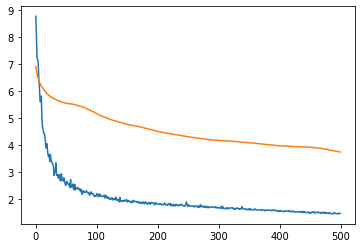

In [ ]:
import keras
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Saving Model

In [ ]:
model.save("/content/drive/MyDrive/Project GCN Dataset/IDS_Batch1_0.2000(validation_accuracy).h5")

# Loading Model

In [ ]:
from keras.models import load_model
# config = model.get_config()
# print(config)
model = load_model("/content/drive/MyDrive/Project GCN Dataset/IDS_Batch1_0.2000(validation_accuracy).h5", custom_objects = {"GCNConv": GCNConv})
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 gcn_conv (GCNConv)             (None, 32)           288         ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 gcn_conv_1 (GCNConv)           (None, 32)           1056        ['gcn_conv[0][0]',           

# Other Batches Features

In [ ]:
b2_features = Node_Features(A2)
b3_features = Node_Features(A3)


# Retrainingh Second Batch

In [ ]:
N = np.shape(A2)[0]
history = model.fit([b2_features, A2],
          e2,
          epochs=1000,
          batch_size=N,
          validation_data=([val_fea, A4], val_enc),
          callbacks=[callback]
        )

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 8.8373 - acc: 0.4079 - val_loss: 3.6044 - val_acc: 0.2048
Epoch 2/1000
1/1 [==============================] - 0s 495ms/step - loss: 7.3806 - acc: 0.4518 - val_loss: 3.4201 - val_acc: 0.2071
Epoch 3/1000
1/1 [==============================] - 1s 503ms/step - loss: 6.0397 - acc: 0.4819 - val_loss: 3.2042 - val_acc: 0.2333
Epoch 4/1000
1/1 [==============================] - 0s 457ms/step - loss: 4.8373 - acc: 0.5115 - val_loss: 2.9499 - val_acc: 0.2571
Epoch 5/1000
1/1 [==============================] - 0s 456ms/step - loss: 4.0627 - acc: 0.5190 - val_loss: 2.6968 - val_acc: 0.2786
Epoch 6/1000
1/1 [==============================] - 0s 469ms/step - loss: 3.5618 - acc: 0.5318 - val_loss: 2.4481 - val_acc: 0.3357
Epoch 7/1000
1/1 [==============================] - 0s 461ms/step - loss: 2.8907 - acc: 0.5438 - val_loss: 2.2542 - val_acc: 0.4214
Epoch 8/1000
1/1 [==============================] - 0s 465ms/step - loss: 2.743

# Plotting after training second batch

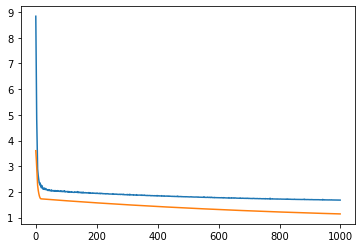

In [ ]:
import keras
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Retraining Third Batch

In [ ]:
N = np.shape(A3)[0]
history = model.fit([b3_features, A3],
          e3,
          epochs=1000,
          batch_size=N,
          validation_data=([val_fea, A4], val_enc),
          callbacks=[callback]
        )

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 28.4645 - acc: 0.2864 - val_loss: 1.1446 - val_acc: 0.8690
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - loss: 12.5364 - acc: 0.3836 - val_loss: 1.1441 - val_acc: 0.8690
Epoch 3/1000
1/1 [==============================] - 1s 1s/step - loss: 5.9001 - acc: 0.4711 - val_loss: 1.1437 - val_acc: 0.8690
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - loss: 3.5368 - acc: 0.5175 - val_loss: 1.1432 - val_acc: 0.8690
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - loss: 2.7236 - acc: 0.5480 - val_loss: 1.1428 - val_acc: 0.8690
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - loss: 2.3302 - acc: 0.5615 - val_loss: 1.1423 - val_acc: 0.8690
Epoch 7/1000
1/1 [==============================] - 1s 1s/step - loss: 2.0438 - acc: 0.5670 - val_loss: 1.1419 - val_acc: 0.8690
Epoch 8/1000
1/1 [==============================] - 1s 1s/step - loss: 1.8759 - acc: 0.5737 - v

# Plotting Final Loss After Training 3rd Batch

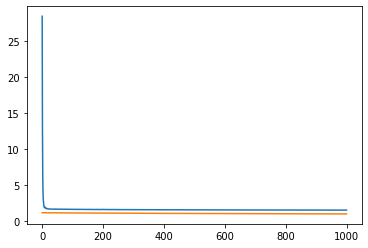

In [ ]:
import keras
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Saving Final Model

In [ ]:
model.save("/content/drive/MyDrive/Project GCN Dataset/Final_Model_IDS_8690.h5")

# Test Accuracy Check

In [ ]:
tsfeatures = Node_Features(A5) 
print("Shape of test features: ", np.shape(tsfeatures))
score_test = model.test_on_batch([tsfeatures, A5], test_enc)
print('Test accuracy:', score_test[1])

Shape of test features:  (298, 8)
Test accuracy: 0.8489933013916016


# Prediction Starts Here

In [ ]:
!apt-get install poppler-utils 
!pip install pdf2image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (116 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
import os
from pdf2image import convert_from_path
from PIL import Image

test_invoices = "/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/PDF Invoices/"
im_path = "/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/"
files = os.listdir(test_invoices)
print("Files found are: ", files)

def pdf_toImage(f):
    file_name = f
    # print("File processed is: ", file_name)
    if(file_name.endswith('.pdf')):
        # print("PDF File Found..")
        # print("Converting", file_name.split('/')[-1], "to Image..")
        pages = convert_from_path(file_name)

        for i in range(len(pages)):
            pages[i].save(im_path+(file_name.split('/')[-1]).split('.')
                          [0]+' page' + str(i) + '.png', 'PNG')
            #converting to grey-scale
            img = Image.open("/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/"+file_name.split('/')[-1].split('.')[0]+' page' + str(i) + '.png').convert('LA')
            img.save("/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/"+file_name.split('/')[-1].split('.')[0]+' page' + str(i) + '.png')
            img = img.resize((1700,1800),Image.ANTIALIAS)
            img.save("/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/"+file_name.split('/')[-1].split('.')[0]+' page' + str(i) + '.png')
    else:
        print("Image File Found..")

pdf_toImage(test_invoices+files[0])


Files found are:  ['Faber 1007843134 (1).pdf', 'pdf_1_AWFA02-user3_5fd169861ba88.pdf', '1007871548 (1).pdf', 'PO 1007880806 (1).pdf']


# Installing Keras-OCR 

In [ ]:
!pip install keras-ocr

     |████████████████████████████████| 41 kB 289 kB/s 
     |████████████████████████████████| 9.5 MB 9.0 MB/s 
     |████████████████████████████████| 873 kB 41.2 MB/s 
     |████████████████████████████████| 123 kB 51.8 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


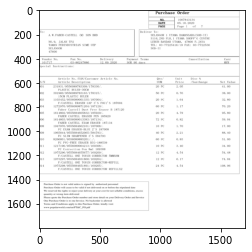

In [ ]:
import keras_ocr
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pipeline = keras_ocr.pipeline.Pipeline()
im_path = "/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/"

im_files_list = os.listdir(im_path)
img = mpimg.imread('/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/'+im_files_list[0])
imgplot = plt.imshow(img)
plt.show()

In [ ]:
import pandas as pd

def tuples_toCSV(csv_dir, file_name, b_prediction):
  Object = []
  xmin = []
  xmax = []
  ymin = []
  ymax = []
  dataframes = []

  for i in range(len(b_prediction)):
    df = pd.DataFrame()
    SmallList_OBJECT = []
    SmallList_XMIN = []
    SmallList_XMAX = []
    SmallList_YMIN = []
    SmallList_YMAX = []
    FILE = b_prediction[i]
    for j in range(len(FILE)):
      SmallList_OBJECT.append(b_prediction[i][j][0])
      SmallList_XMIN.append(b_prediction[i][j][1][1][0])
      SmallList_YMIN.append(b_prediction[i][j][1][1][1])
      SmallList_XMAX.append(b_prediction[i][j][1][2][0])
      SmallList_YMAX.append(b_prediction[i][j][1][2][1])
    
    Object.append(SmallList_OBJECT)
    xmin.append(SmallList_XMIN)
    xmax.append(SmallList_XMAX)
    ymin.append(SmallList_YMIN)
    ymax.append(SmallList_YMAX)

    df['xmin'] = SmallList_XMIN
    df['xmax'] = SmallList_XMAX
    df['ymin'] = SmallList_YMIN
    df['ymax'] = SmallList_YMAX
    df['Object'] = SmallList_OBJECT
    dataframes.append(df)

  return dataframes


In [ ]:
import numpy as np
image_dir = im_path

csv_dir = "/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/CSVs"

def batchData_Tuple(ImagePath):
  f_names = []
  custom_images = []
  for filename in os.listdir(ImagePath):
      # print(os.path.join(ImagePath, filename))
      f_names.append(filename)
      custom_images.append(os.path.join(ImagePath, filename))

  images = [ keras_ocr.tools.read(path) for path in custom_images ]
  t_images = len(images)
  image_batches = []
  batch_start = 0
  batch_end = 3
  while(batch_start < t_images):
    batch = []
    batch = images[batch_start:batch_end]
    batch_start = batch_end
    batch_end = batch_start + 3
    image_batches.append(batch)
  
  batch = images[batch_start:]    
  return f_names, image_batches

file_names = batchData_Tuple(image_dir)[0]
image_batches = batchData_Tuple(image_dir)[1]


print("File names are: ", file_names)
t_batches = len(image_batches[1])
print("Total batches are: ", t_batches)

def batch_toDataframe(batches_array):
  dataframes = []
  for i in range(len(batches_array)):
    im_batch = batches_array[i]
    prediction = pipeline.recognize(im_batch)
    df_batch = tuples_toCSV(csv_dir, file_names[i], prediction)
    dataframes.append(df_batch)
  
  return dataframes

df_batches = batch_toDataframe(image_batches)
print(len(df_batches))


File names are:  ['Faber 1007843134 (1) page0.png', 'Faber 1007843134 (1) page4.png', 'Faber 1007843134 (1) page1.png', 'Faber 1007843134 (1) page3.png', 'Faber 1007843134 (1) page2.png', 'Faber 1007843134 (1) page6.png', 'Faber 1007843134 (1) page5.png']
Total batches are:  3
3


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def df_AdjMatrix(df_array):
  matrices  = []
  for i in range(len(df_array)):
    for j in range(len(df_array[i])):
      G = makeGraph(df_array[i][j])
      M = nx.to_numpy_array(G, dtype=np.int32)
      matrices.append(M)
      
  return matrices

matrices = df_AdjMatrix(df_batches)
print("Total matrices are: ", len(matrices))

Total matrices are:  7


In [ ]:
mat_nodeFeatures = []
for i in range(len(matrices)):
  F = Node_Features(matrices[i])
  mat_nodeFeatures.append(F)

for j in range(len(mat_nodeFeatures)):
  print(mat_nodeFeatures[j])

[[0.         0.41387184 1.33379805 ... 1.92934057 0.         2.8579611 ]
 [0.         0.49174509 1.58476268 ... 2.29236123 0.         3.39570904]
 [0.         0.42210087 1.36031801 ... 1.96770172 0.         2.91478606]
 ...
 [0.         0.74787367 2.41019647 ... 3.48635225 0.         5.16438584]
 [0.         0.53585512 1.72691747 ... 2.49798831 0.         3.70030753]
 [0.         0.27446238 0.88451871 ... 1.27945743 0.         1.89527947]]
[[0.         1.96544609 0.         ... 0.         0.         1.11779619]
 [0.         3.43112105 0.         ... 0.         0.         1.95136059]
 [0.         2.34267719 0.         ... 0.         0.         1.33233654]
 ...
 [0.         4.68054889 0.         ... 0.         0.         2.66194008]
 [0.         4.45949627 0.         ... 0.         0.         2.53622217]
 [0.         3.48878695 0.         ... 0.         0.         1.98415657]]
[[0.         0.0135685  0.         ... 1.32232663 1.32538511 1.32525516]
 [0.         0.01604533 0.         ... 

# Model evaluation


```
# This is formatted as code
```



In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
print(np.shape(mat_nodeFeatures[0]))
print(np.shape(matrices[0])) 

x = [mat_nodeFeatures[0], matrices[0]]

l = model.predict_on_batch(x)
print(l[0])


(267, 8)
(267, 267)
[0.00277735 0.00208281 0.0711107  0.00392426 0.24160786 0.07019469
 0.01380891 0.0064751  0.01624123 0.0200671  0.0145571  0.5371529 ]


# Test Accuracy Check

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

def predict(self):
        """
        Predicts the model output, and computes precision, recall, and F1 score.
        INPUT
            model: Model trained in Keras
        OUTPUT
            Precision, Recall, and F1 score
        """
        predictions = model.predict(self.X_test)
        predictions = np.argmax(predictions, axis=1)

        # predictions[predictions >=1] = 1
        # Remove when non binary classifier

        y_test = np.argmax(y_test, axis=1)

        precision = precision_score(self.y_test, predictions, average="micro")
        recall = recall_score(self.y_test, predictions, average="micro")
        f1 = f1_score(self.y_test, predictions, average="micro")
        cohen_kappa = cohen_kappa_score(self.y_test, predictions)
        return precision, recall, f1, cohen_kappa, 'No Cuda Training'